<a href="https://colab.research.google.com/github/vibinhvn/DA/blob/main/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Load dataset

In [148]:
#load data
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [149]:
#inspect dataset
print(f"Number of columns: {df.shape[0]}")
print(f"Number of rows: {df.shape[1]}")

Number of columns: 569
Number of rows: 33


## 1.1 First look on attributes

In [150]:
print('Attribute format')
print(df.info())

Attribute format
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter

In [151]:
#Drop 32th column.
df = df.drop(axis=1, columns='Unnamed: 32')

## 1.2 Data cleanliness

In [152]:
print(f"The number of null records: {df.isnull().sum().sum()}")
print(f"The number of duplicated records: {df.duplicated().sum()}")

The number of null records: 0
The number of duplicated records: 0


#2. Descriptive analysis

## 2.1 Target analysis

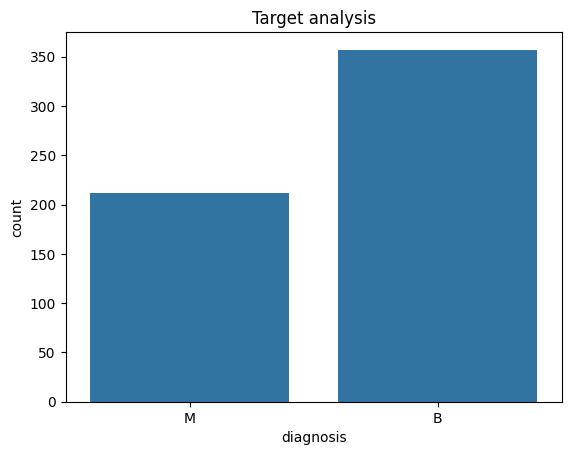

In [153]:
plt.plot(figsize=(7,7))
sns.countplot(data=df,x='diagnosis')
plt.title('Target analysis')
plt.show()

Note: The class was imbalance, this imbalance could cause the bias in classification of M-class.

## 2.2 Attributes Univariate analysis

In [154]:
attributes = df.columns.difference(['id','diagnosis'])

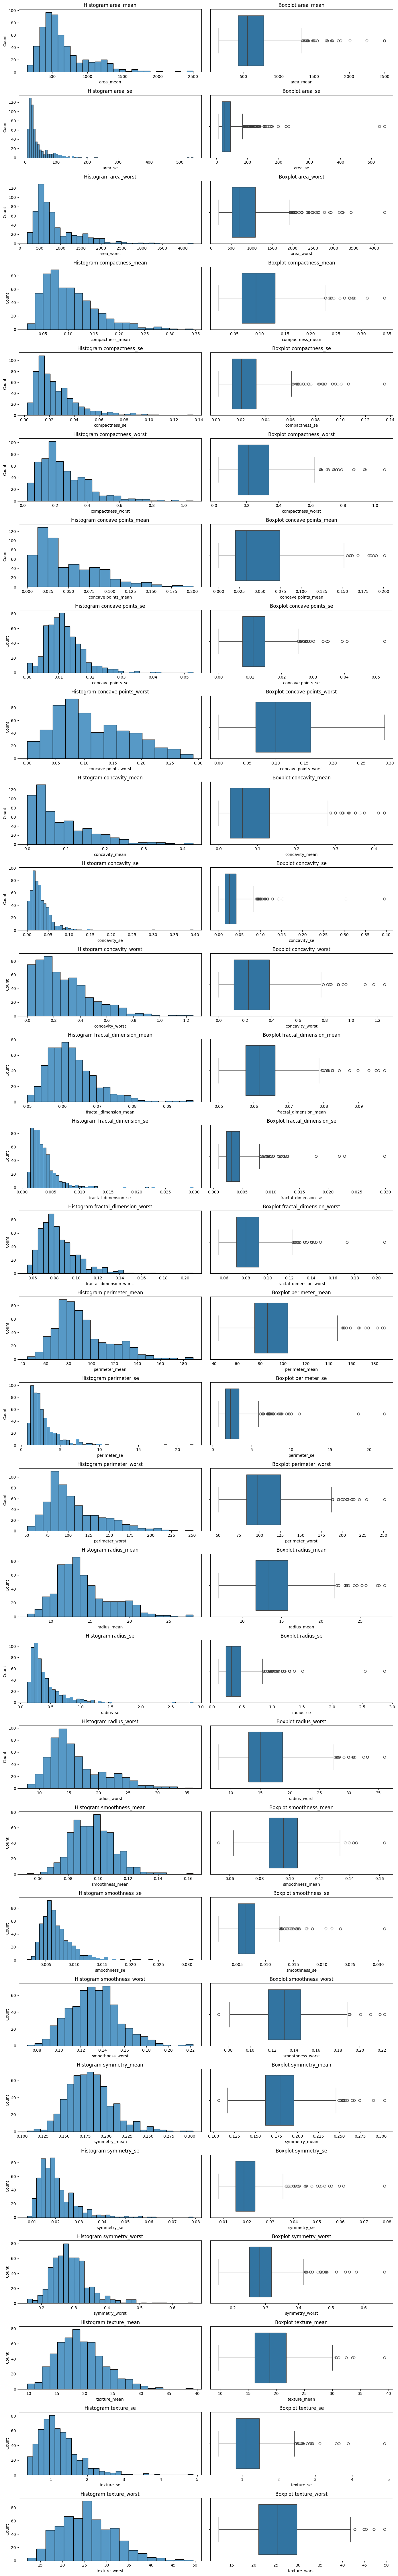

In [155]:
#Plot histogram and boxplot
fig, ax = plt.subplots(len(attributes),2,figsize=(14,len(attributes)*3))
for i,attribute in enumerate(attributes):
  sns.histplot(data=df,x=attribute,ax=ax[i,0])
  ax[i,0].set_title(f"Histogram {attribute}")
  sns.boxplot(data=df,x=attribute,ax=ax[i,1])
  ax[i,1].set_title(f"Boxplot {attribute}")
plt.tight_layout()
plt.show()

In general, almost of the data have outliners, which introduced the noice to the model.

# 3. Multivariated analysis

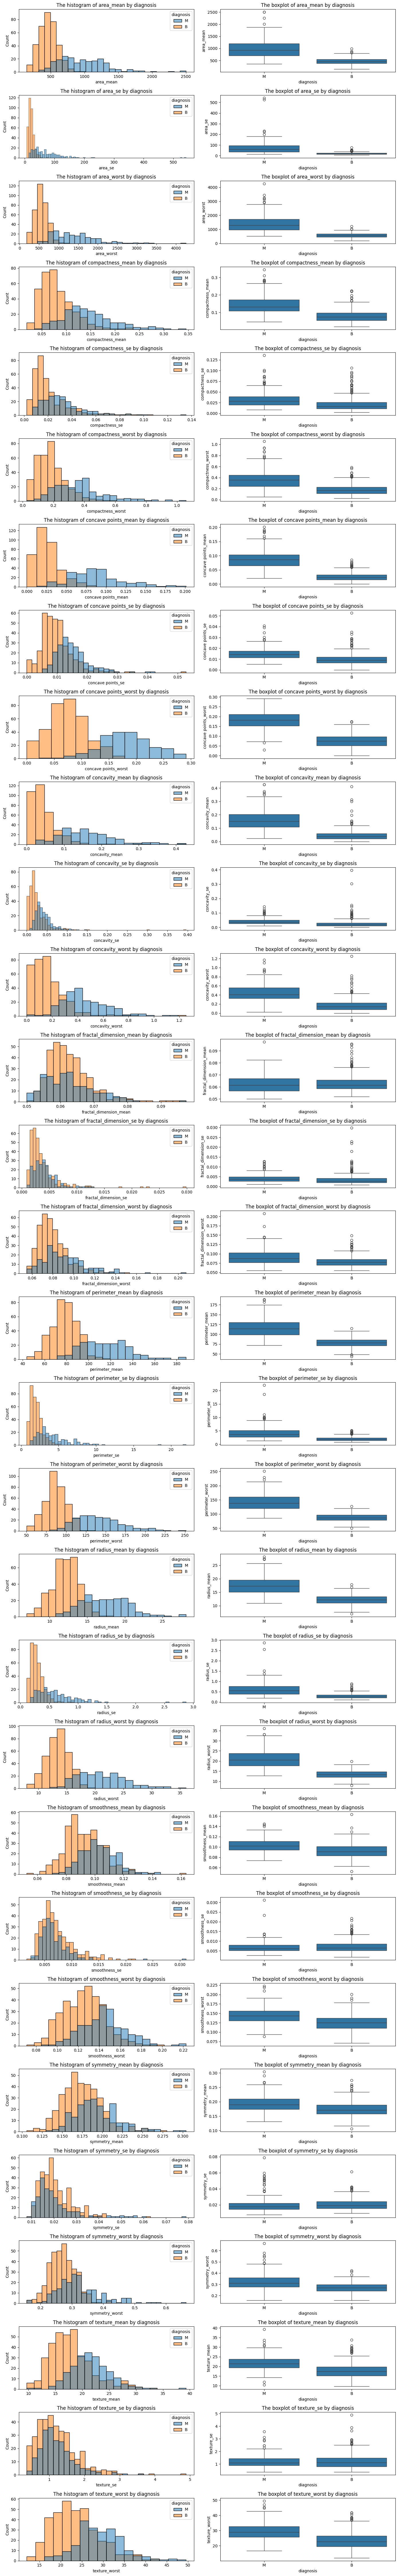

In [156]:
fig, ax = plt.subplots(len(attributes),2,figsize=(14,len(attributes)*3))
for i,var in enumerate(attributes):
  sns.histplot(data=df,x=var,hue='diagnosis',ax=ax[i,0])
  ax[i,0].set_title(f"The histogram of {var} by diagnosis")
  sns.boxplot(data=df,x='diagnosis',y=var,ax=ax[i,1])
  ax[i,1].set_title(f"The boxplot of {var} by diagnosis")
plt.tight_layout()
plt.show()

In [157]:
not_predictors = ['texture_se', 'symmetry_worst', 'symmetry_se','symmetry_mean', 'smoothness_se', 'moothness_mean', 'fractal_dimension_worst','fractal_dimension_se','fractal_dimension_mean',
'concave points_se','compactness_se']
potential = list(set(attributes).difference(set(not_predictors)))

**Observations:**
<br> In general,
 - Malignant cancer tend to have the area_mean higher than the benign cancer.
 - Malignant cancer tend to have the area_se higher than the benign cancer.
 - Malignant cancer tend to have the area_worst higher than the benign cancer.
 - Malignant cancer tend to have the compactness_mean higher than the benign cancer.
 - Malignant cancer tend to have the compactness_se higher than the benign cancer.
 - Malignant cancer tend to have the compactness_worst higher than the benign cancer.
 - Malignant cancer tend to have the concave points_mean higher than the benign cancer.
 - Malignant cancer tend to have the concave points_worst higher than the benign cancer.
 - Malignant cancer tend to have the concativity_mean higher than the benign cancer.
 - Malignant cancer tend to have the concativity_worst higher than the benign cancer.
 - Malignant cancer tend to have the perimeter_mean higher than the benign cancer.
 - Malignant cancer tend to have the perimeter_se higher than the benign cancer.
 - Malignant cancer tend to have the perimeter_worst higher than the benign cancer.
 - Malignant cancer tend to have the radius_mean higher than the benign cancer.
 - Malignant cancer tend to have the radius_se higher than the benign cancer.
 - Malignant cancer tend to have the radius_worst higher than the benign cancer.
 - Malignant cancer tend to have the smoothness_worst higher than the benign cancer.
 - Malignant cancer tend to have the texture_mean higher than the benign cancer.
 - Malignant cancer tend to have the texture_worst higher than the benign cancer.


## 4: Predictor choices


In [158]:
from scipy.stats import entropy

def kl_divergence(predictor):
  #Adjust the bins
  p_malignant = df[df['diagnosis']=='M'][predictor]
  q_benign = df[df['diagnosis']=='B'][predictor]
  #Data range
  data_min = min(p_malignant.min(),q_benign.min())
  data_max = max(p_malignant.max(),q_benign.max())
  #Recreate bins
  bins = np.linspace(data_min-1,data_max+1,200)
  #Compute histogram and normalize
  hist1, _ = np.histogram(p_malignant,bins=bins,density=True)
  hist2, _ = np.histogram(q_benign,bins=bins,density=True)
  #normalize
  eps = 1e-10
  hist1 = hist1/hist1.sum() + eps
  hist2 = hist2/hist2.sum() + eps
  #Compute KL divergence
  kl_div = entropy(hist1,hist2)
  return kl_div

#Create dictionary to store
kl_div = {}

#Compute divergence
for predictor in potential:
  kl_div[predictor] = kl_divergence(predictor)

#Sort from Z-A
sorted_kl_divergence = dict(sorted(kl_div.items(), key=lambda item: item[1], reverse=True))

In [159]:
from sklearn.feature_selection import mutual_info_classif
df_spare = df[list(set(potential)|{'diagnosis'})] #add diagnosis
df_spare['diagnosis'] = df_spare['diagnosis'].map({'M':1,'B':0})
# Compute mutual information
mi_scores = mutual_info_classif(df_spare.drop(columns=['diagnosis']),df_spare['diagnosis'])
# Store result
result = dict(zip(df_spare.drop(columns=['diagnosis']).columns,mi_scores))

<ipython-input-159-44f316097e0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spare['diagnosis'] = df_spare['diagnosis'].map({'M':1,'B':0})


In [160]:
#Map KL divergence and mutual information into a dataframe
kl_mi = pd.DataFrame(columns=['Attribute','KL','MI'])
kl_mi['Attribute'] = potential

# Add value to KL, MI
for attribute in potential:
  kl_mi.loc[kl_mi['Attribute']==attribute,'KL'] = sorted_kl_divergence[attribute]
  kl_mi.loc[kl_mi['Attribute']==attribute,'MI'] = result[attribute]

print(kl_mi)

               Attribute         KL        MI
0          texture_worst   4.384994  0.122727
1           texture_mean   2.796808  0.097664
2       compactness_mean   2.848928  0.215313
3             area_worst  13.254941  0.465433
4   concave points_worst   9.907869  0.436972
5       smoothness_worst   0.678064  0.092285
6              area_mean  11.861637  0.360688
7      compactness_worst   4.549891   0.22516
8              radius_se   6.273723  0.248635
9        smoothness_mean   0.326652  0.077109
10       perimeter_worst  14.180512  0.473239
11        concavity_mean   7.861171  0.372646
12           radius_mean  12.403883  0.365786
13               area_se   9.817003  0.341019
14   concave points_mean   7.970667  0.441213
15          radius_worst   13.47354  0.455343
16       concavity_worst   6.556786  0.316186
17          concavity_se   0.687282  0.119257
18        perimeter_mean  12.553818  0.403854
19          perimeter_se   5.931668  0.273555


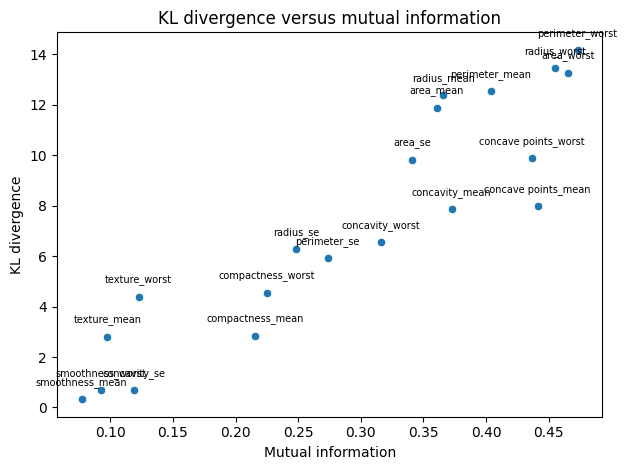

In [161]:
#Plot scatter plot
sns.scatterplot(data=kl_mi, x='MI', y='KL')
plt.title('KL divergence versus mutual information')
for i in range(len(kl_mi)):
  plt.annotate(kl_mi['Attribute'][i], (kl_mi['MI'][i], kl_mi['KL'][i]),textcoords="offset points", xytext=(0,10), ha='center',fontsize=7)
plt.xlabel('Mutual information')
plt.ylabel('KL divergence')
plt.tight_layout()
plt.show()

The KL indiacted how different of the distribution of B class compared with M class in an attribute itself. It suggests how suprise of the M class distribution is when we have known the B class distriburion. The high KL divergence implied the greater clearly constrast in distribution between these classes.

The mutual information (MI) have quantity the dependence of the attribute on the target variables. The high MI score suggests the high dependence of the attribute versus target variable.

The choice of predictors ideally choose the attribute wit high KL score and high MI score.

In [162]:
#Predictor choice:
choices = kl_mi[(kl_mi["KL"]>kl_mi["KL"].mean())|(kl_mi["MI"]>kl_mi['MI'].mean())]
predictor = list(choices['Attribute'])

# 5: Model fiting

In [163]:
#Create new dataset which included just only predictors
df_ready = df[list(set(predictors)|{'diagnosis'})]

#Encode diagnosis
df_ready['diagnosis'] = df_ready['diagnosis'].map({'M':1,'B':0})

<ipython-input-163-91166035e369>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ready['diagnosis'] = df_ready['diagnosis'].map({'M':1,'B':0})


In [164]:
#Import essential library
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

## 5.1: Split dataset

In [165]:
import random
random.seed(2024)
X = df_ready.drop(columns=['diagnosis'])
y = df_ready['diagnosis']
#Split dataset
X_valid, X_test, y_valid, y_test = train_test_split(X,y,test_size = 0.2, stratify=y)

In [166]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_valid = scaler.fit_transform(X_valid)

## 5.2: Model fit

In [167]:
#Initial model
model = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGB": XGBClassifier(eval_metric='logloss'),
}

#Perform cross-validation
kf = StratifiedKFold(n_splits =5, shuffle=True)

#Result dict:
result_cv = {}
model_scores = {}
#Perform cross validation
for name, model in model.items():
  cv_scores = cross_val_score(model,X_valid,y_valid,cv=kf,scoring = 'recall')
  result_cv[name] = np.mean(cv_scores)
  model_scores[name] = model

# Print result
print(result_cv)

{'Decision Tree': 0.9294117647058823, 'Random Forest': 0.9470588235294117, 'XGB': 0.9470588235294117}


**Comment**: In general, the model's performance have reached to high recall score (over 90% in recall rate of classification). In detail, Random Forest yield the best peformance.

In [168]:
#The best model
best_model_name =  max(result_cv, key=result_cv.get)
best_model = model_scores[best_model_name]
best_model.fit(X_valid,y_valid)

RandomForestClassifier()

## 5.3: Testing on unseen dataset

In [ ]:
#Scale X_test
X_test = scaler.transform(X_test)

In [176]:
y_pred = best_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred)}")
cr = classification_report(y_test,y_pred)
print(cr)

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Text(0.5, 1.0, 'Confusion Matrix')

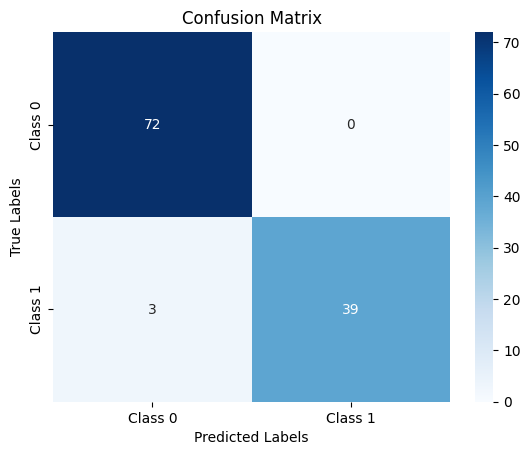

In [178]:
cm = confusion_matrix(y_test,y_pred)
plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')